In [2]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np

In [56]:
# initial conditions
gravity = 9.8
length = 2.5
friction = 0.15
initial_state = [179.5 * np.pi/180, 0] # [angle, velocity]

time_range = (0, 30)
times_to_store = np.linspace(0, time_range[1], 200)

In [57]:
def pendODE(time, state):
    angle = state[0]
    velocity = state[1]
    
    angle_dot = velocity
    velocity_dot = (-gravity/length)*np.sin(angle) - friction*velocity
    state_dot = [angle_dot, velocity_dot]
    
    return state_dot

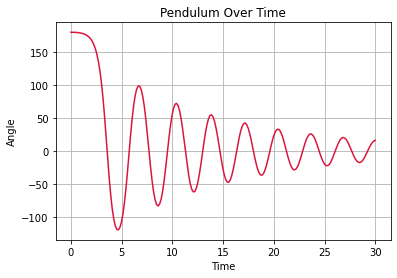

In [58]:
solved = scipy.integrate.solve_ivp(pendODE, time_range, initial_state, t_eval = times_to_store, method = 'DOP853', max_step = 0.01)
time = solved.t
angle_over_time = solved.y[0]
velocity_over_time = solved.y[1]

plt.title("Pendulum Over Time")
plt.xlabel('Time')
plt.ylabel('Angle')
plt.grid(True)

plt.plot(time, angle_over_time * 180/np.pi, color='crimson')
plt.show()